In [1]:
import pandas as pd
import numpy as np

# Define the sample size
sample_size = 265

# Define column names
columns = [
    "Gender", "Marital Status", "Education", "Age",
    "MLA1", "MLA2", "MLA3", "MLA4", "MLA5", "MLA6", "MLA7", "MLA8", "MLA9", "MLA10",
    "MLC1", "MLC2", "MLC3", "MLC4", "MLC5", "MLC6", "MLC7", "MLC8", "MLC9", "MLC10",
    "MLPR1", "MLPR2", "MLPR3", "MLPR4", "MLPR5", "MLPR6", "MLPR7", "MLPR8", "MLPR9", "MLPR10",
    "FP1", "FP2", "FP3", "FP4", "FP5", "FP6", "FP7", "FP8", "FP9"
]

# 1. Generate demographic data
gender = np.random.choice(["Male", "Female"], sample_size)
marital_status = np.random.choice(["Single", "Married"], sample_size)
education = np.random.choice(["Certificate", "Diploma", "Degree", "Masters"], sample_size)
age = np.random.choice(["18-25 Years", "26-33 Years", "34-41 Years", "Above 42 years"], sample_size)

# 2. Generate MLA, MLC, and MLPR with strong correlations
# Base latent variables for MLA, MLC, MLPR
latent_MLA = np.random.normal(3.5, 0.5, sample_size)  # Strong base variable for MLA
latent_MLC = latent_MLA + np.random.normal(0, 0.3, sample_size)  # Add small noise to correlate with MLA
latent_MLPR = latent_MLA + np.random.normal(0, 0.3, sample_size)  # Add small noise to correlate with MLA

# Create 10 items each for MLA, MLC, and MLPR by adding small random noise
mla_columns = [latent_MLA + np.random.normal(0, 0.2, sample_size) for _ in range(10)]
mlc_columns = [latent_MLC + np.random.normal(0, 0.2, sample_size) for _ in range(10)]
mlpr_columns = [latent_MLPR + np.random.normal(0, 0.2, sample_size) for _ in range(10)]

# Clip values to range 1-5 for Likert scale realism
mla_columns = [np.clip(col, 1, 5) for col in mla_columns]
mlc_columns = [np.clip(col, 1, 5) for col in mlc_columns]
mlpr_columns = [np.clip(col, 1, 5) for col in mlpr_columns]

# 3. Generate FP (dependent variable) with strong correlation to MLA, MLC, and MLPR
# FP is a weighted sum of MLA, MLC, MLPR + small noise
latent_FP = (
    0.4 * latent_MLA +
    0.3 * latent_MLC +
    0.3 * latent_MLPR +
    np.random.normal(0, 0.2, sample_size)
)

# Create 9 items for FP by adding small random noise to latent_FP
fp_columns = [latent_FP + np.random.normal(0, 0.2, sample_size) for _ in range(9)]
fp_columns = [np.clip(col, 1, 5) for col in fp_columns]

# 4. Combine data into a DataFrame
data = {
    "Gender": gender,
    "Marital Status": marital_status,
    "Education": education,
    "Age": age
}

# Add MLA, MLC, MLPR, and FP columns to the dataset
for i, col in enumerate(mla_columns, 1):
    data[f"MLA{i}"] = col
for i, col in enumerate(mlc_columns, 1):
    data[f"MLC{i}"] = col
for i, col in enumerate(mlpr_columns, 1):
    data[f"MLPR{i}"] = col
for i, col in enumerate(fp_columns, 1):
    data[f"FP{i}"] = col

# Create the DataFrame
df_strong = pd.DataFrame(data)

# Display first few rows to confirm
df_strong.head()

,Gender,Marital Status,Education,Age,MLA1,MLA2,MLA3,MLA4,MLA5,MLA6,...,MLPR10,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9
0,Male,Single,Masters,Above 42 years,3.042389,2.802336,3.146420,2.779516,2.909762,3.098299,...,3.386724,2.737554,3.051126,2.035655,2.900828,2.518060,2.490086,2.687607,2.839939,2.502559
1,Male,Single,Diploma,18-25 Years,3.435536,3.794599,3.847807,3.475328,3.987187,3.693950,...,3.485541,3.759944,3.637328,3.952703,3.755159,3.571770,3.922738,3.632580,3.490011,3.869258
2,Female,Married,Diploma,26-33 Years,4.018381,4.431858,4.239978,4.525277,4.474947,4.183042,...,4.529143,3.985085,4.284253,3.828688,4.009303,4.081120,4.186728,3.853597,3.994044,4.188717
3,Male,Married,Diploma,18-25 Years,2.803165,3.070197,3.195105,2.912120,3.044871,2.459074,...,2.800141,2.789622,2.977330,2.672522,2.929220,2.664416,2.762604,2.727714,3.011057,2.857650
4,Male,Married,Certificate,18-25 Years,3.689464,3.788307,3.655733,3.717888,3.685055,3.992652,...,3.413940,3.646505,3.796570,3.818055,3.741094,3.727014,3.824498,3.987594,3.690391,3.926117


In [10]:
df_strong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          265 non-null    object 
 1   Marital Status  265 non-null    object 
 2   Education       265 non-null    object 
 3   Age             265 non-null    object 
 4   MLA1            265 non-null    float64
 5   MLA2            265 non-null    float64
 6   MLA3            265 non-null    float64
 7   MLA4            265 non-null    float64
 8   MLA5            265 non-null    float64
 9   MLA6            265 non-null    float64
 10  MLA7            265 non-null    float64
 11  MLA8            265 non-null    float64
 12  MLA9            265 non-null    float64
 13  MLA10           265 non-null    float64
 14  MLC1            265 non-null    float64
 15  MLC2            265 non-null    float64
 16  MLC3            265 non-null    float64
 17  MLC4            265 non-null    flo

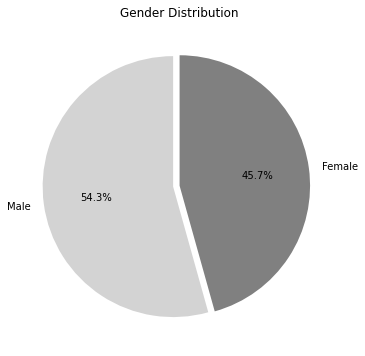

In [3]:
import matplotlib.pyplot as plt

# Create a pie chart for gender distribution with percentages
plt.figure(figsize=(6, 6))
df_strong['Gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgray', 'gray'],
    explode=(0.05, 0)
)
plt.ylabel('')  # Remove y-axis label for a cleaner look
plt.title('Gender Distribution')
plt.show()

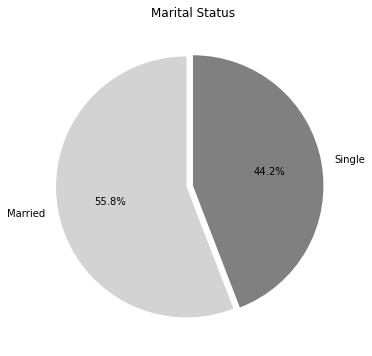

In [4]:
import matplotlib.pyplot as plt

# Create a pie chart for gender distribution with percentages
plt.figure(figsize=(6, 6))
df_strong['Marital Status'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgrey', 'grey'],
    explode=(0.05, 0)
)
plt.ylabel('')  # Remove y-axis label for a cleaner look
plt.title('Marital Status')
plt.show()

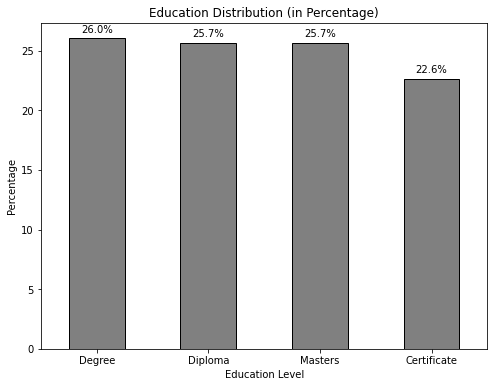

In [9]:
# Re-creating the bar chart for "Education" with percentages

# Calculate percentage distribution
education_percentage = df_strong['Education'].value_counts(normalize=True) * 100

# Plot bar chart
plt.figure(figsize=(8, 6))
education_percentage.plot(kind='bar', color='gray', edgecolor='black')

# Add title and labels
plt.title('Education Distribution (in Percentage)')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Annotate each bar with the percentage value
for i, percentage in enumerate(education_percentage):
    plt.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center', fontsize=10)

plt.show()


### MOBILE LOANS ACCESSIBILITY

In [16]:
# Select MLA1 to MLA10 columns for analysis
mla_columns = [f"MLA{i}" for i in range(1, 11)]
mla_descriptive_stats = df_strong[mla_columns].describe()

# Display the descriptive statistics
print("Descriptive Statistics for MLA1 to MLA10:")
print(mla_descriptive_stats)

# Copy the descriptive statistics to clipboard
mla_descriptive_stats.to_clipboard()

# Now you can paste it directly into Word
print("Descriptive statistics copied to clipboard.")

Descriptive Statistics for MLA1 to MLA10:
             MLA1        MLA2        MLA3        MLA4        MLA5        MLA6  \
count  265.000000  265.000000  265.000000  265.000000  265.000000  265.000000   
mean     3.521472    3.538328    3.504824    3.524956    3.537694    3.523678   
std      0.543380    0.558566    0.542152    0.523279    0.544765    0.541764   
min      1.075818    1.494538    1.718311    1.653830    1.613074    1.338731   
25%      3.168312    3.149562    3.140753    3.180413    3.161355    3.156448   
50%      3.506204    3.558398    3.540426    3.475328    3.542594    3.543342   
75%      3.872951    3.954222    3.891087    3.937984    3.915177    3.879626   
max      4.888895    5.000000    5.000000    5.000000    5.000000    5.000000   

             MLA7        MLA8        MLA9       MLA10  
count  265.000000  265.000000  265.000000  265.000000  
mean     3.535379    3.529150    3.516179    3.528098  
std      0.560362    0.556098    0.548802    0.532023  
min 

ImportError: cannot import name 'CompressionOptions' from 'pandas._typing' (c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\_typing.py)

In [18]:
# Save the descriptive statistics as an Excel file
mla_descriptive_stats.to_excel('MLA_Descriptive_Statistics.xlsx')

# Now you can open the Excel file and copy the table into Word
print("Descriptive statistics saved to MLA_Descriptive_Statistics.xlsx")


Descriptive statistics saved to MLA_Descriptive_Statistics.xlsx
